# Research Track 2 - Assignment 3
##### Jan Drozd (s5646665)


The objective of this assignment is to propose and test a hypothesis concering the perfrmance of two solutions to the problem of Research Track 1 - Assignment 1

## Hypotheses:

### Null Hypothesis: 
There is no significant difference between the performances of the [proposed solution](https://github.com/drozdja/ResearchTrack---Assignment1.git) and the [alternative solution](https://github.com/amanarora9848/unige-rt1-assignment1.git) when tokens are randomly placed in the environment.

### Alternative Hypothesis:
There is a significant difference between the performances of the [proposed solution](https://github.com/drozdja/ResearchTrack---Assignment1.git) and the [alternative solution](https://github.com/amanarora9848/unige-rt1-assignment1.git) when tokens are randomly placed in the environment.


## Description and motivation of the experimental setup

### Type of Experiments:
 - Compare performances with robot starting from the same postion and with the obstacles in the same places in the environment.
 - Compare performances with robot starting from the same postion, but random placement of obstacles in the environment.

### Number of Repetitions:
 - To ensure the statistical validity of our results, each experiment will be repeated at least 100 times to satisfy the Central Limit Theorem, which states that the distribution of the average of many observations drawn from a population will be normally distributed.
 
#### Statistical Approach:
 - Collecting the average time of execution
 - Computeing average and standard deviation of both solutions over the 100 runs
 - Peforming a two-sample t-test to compare the means betwwe the solutions
 
If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference between the two implementations. If not, we fail to reject the null hypothesis, concluding that there's no significant difference

## Experiment

In [1]:
import os
import time
import numpy as np
from scipy import stats
import subprocess
import matplotlib.pyplot as plt

avg_time_1 = []
std_time_1 = []
avg_time_2 = []
std_time_2 = []


In [2]:
# Clone repositories with both algorithms to compare
!git clone https://github.com/drozdja/ResearchTrack---Assignment1.git
!git clone https://github.com/amanarora9848/unige-rt1-assignment1.git

fatal: destination path 'ResearchTrack---Assignment1' already exists and is not an empty directory.
fatal: destination path 'unige-rt1-assignment1' already exists and is not an empty directory.


Evaluation of the performance based on time of execution

In [3]:
def evaluate(directory):
    start_time = time.time()
    result = subprocess.run(['python2', directory+'/run.py', directory+'/assignment.py'], capture_output=True, text=True)
    end_time = time.time()
    
    # calculate time of execution
    time_taken = end_time - start_time

    return time_taken


Running experiments

In [4]:
num_iterations = 100
measured_solution1 = [evaluate('ResearchTrack---Assignment1') for _ in range(num_iterations)]
measured_solution2 = [evaluate('unige-rt1-assignment1') for _ in range(num_iterations)]


Calculating the statistical data

In [5]:
avg_time_1 = (np.mean([time for time in measured_solution1]))
std_time_1 = (np.std([time for time in measured_solution1]))
avg_time_2 = (np.mean([time for time in measured_solution2]))
std_time_2 = (np.std([time for time in measured_solution2]))

print(f'First implementation: avg_time = {avg_time_1}, std_time = {std_time_1}')
print(f'Second implementation: avg_time = {avg_time_2}, std_time = {std_time_2}')


First implementation: avg_time = 0.014316620826721192, std_time = 0.0050426710652231865
Second implementation: avg_time = 0.014373397827148438, std_time = 0.006497791098266717


Plot

Text(0.5, 1.0, 'Comparison of Execution Time')

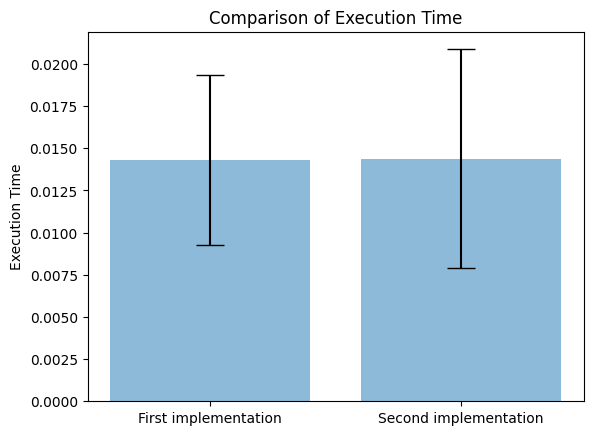

In [6]:
mean_values = [avg_time_1, avg_time_2]
std_dev = [std_time_1, std_time_2]

fig, ax = plt.subplots()

solutions = ["First implementation", "Second implementation"]

ax.bar(solutions, mean_values, yerr=std_dev, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Execution Time')
ax.set_title('Comparison of Execution Time')

p-value

In [7]:
t_statistic, p_value = stats.ttest_ind([time for time in measured_solution1], [time for time in measured_solution2])
print(f't-statistic = {t_statistic}, p-value = {p_value}')


t-statistic = -0.06868417993222127, p-value = 0.9453103239874228


Repeating with random placement of the obstacles

In [8]:
num_iterations = 100
measured_solution1_rand = [evaluate('ResearchTrack---Assignment1') for _ in range(num_iterations)]
measured_solution2_rand = [evaluate('unige-rt1-assignment1') for _ in range(num_iterations)]

In [9]:
avg_time_1_rand = (np.mean([time for time in measured_solution1_rand]))
std_time_1_rand = (np.std([time for time in measured_solution1_rand]))
avg_time_2_rand = (np.mean([time for time in measured_solution2_rand]))
std_time_2_rand = (np.std([time for time in measured_solution2_rand]))

print(f'First implementation: avg_time = {avg_time_1_rand}, std_time = {std_time_1_rand}')
print(f'Second implementation: avg_time = {avg_time_2_rand}, std_time = {std_time_2_rand}')

First implementation: avg_time = 0.013304643630981446, std_time = 0.0015589129569906859
Second implementation: avg_time = 0.012692081928253173, std_time = 0.0013005638630846246


Text(0.5, 1.0, 'Comparison of Execution Time')

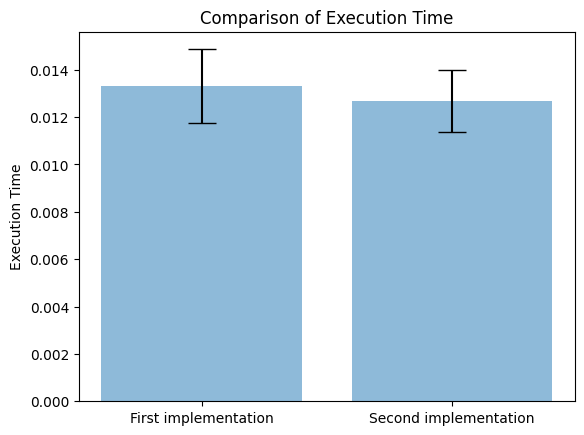

In [10]:
mean_values_rand = [avg_time_1_rand, avg_time_2_rand]
std_dev_rand = [std_time_1_rand, std_time_2_rand]

fig1, ax1 = plt.subplots()

solutions_rand = ["First implementation", "Second implementation"]

ax1.bar(solutions_rand, mean_values_rand, yerr=std_dev_rand, align='center', alpha=0.5, ecolor='black', capsize=10)
ax1.set_ylabel('Execution Time')
ax1.set_title('Comparison of Execution Time')

In [11]:
t_statistic_rand, p_value_rand = stats.ttest_ind([time for time in measured_solution1_rand], [time for time in measured_solution2_rand])
print(f't-statistic = {t_statistic_rand}, p-value = {p_value_rand}')

t-statistic = 3.0021370585246614, p-value = 0.0030262541070656093


## Summary of the results 

The results suggest that the average execution times of the first and second implementations are very close when the initial positions of the blocks are always the same. The standard deviations are also similar, indicating a comparable amount of variation in the execution times of both implementations. The p-value from the t-test is 0.9453, much larger than the standard threshold of 0.05 for statistical significance. Therefore, the null hypothesis that there is no difference between the two implementations in this scenario cannot be rejected. 

On the other hand, when the initial positions of the blocks are randomly placed, the second implementation shows a slightly lower average execution time compared to the first one. Their standard deviations remain comparable. However, the p-value from the t-test is 0.00303, which is less than 0.05, indicating a statistically significant difference between the two implementations in this scenario. Therefore, we reject the null hypothesis and conclude that there is a significant difference in performance between the two implementations when the obstacles are placed randomly.

## Conclusion

In conclusion, the first and second implementations perform similarly when the initial positions of the blocks are fixed. However, when the blocks are randomly placed, the second implementation tends to have a lower average execution time. This suggests that the second implementation might be more robust to changes in the environment, making it potentially more useful in real-world situations where block placement can vary. However, the practical significance of these results would depend on the specific application and how much variation is expected in the initial block placement. It would also be helpful to consider other performance metrics than the time of execution.